### Importing necessary libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from livelossplot import PlotLossesKeras
import seaborn as sns
sns.set_theme(context='poster')
sns.set_context("paper")
%matplotlib inline

from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import ReLU
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

### Loading data from file

In [2]:
data = np.load("ORL_faces.npz")
for i,lst in zip(range(4),data.files):
    if i==0:
        testY = data[lst]
    elif i==1:
        testX = data[lst]
    elif i==2:
        trainX = data[lst]
    else:
        trainY = data[lst]
        
trainX = trainX.reshape((240,112,92))
testX = testX.reshape((160,112,92))

print("Training data shape :",trainX.reshape((240,112,92)).shape,trainY.shape)
print("Test data shape :",testX.reshape((160,112,92)).shape,testY.shape)

Training data shape : (240, 112, 92) (240,)
Test data shape : (160, 112, 92) (160,)


#### Unique classes from train set

In [3]:
classes = np.unique(trainY)
nClasses = len(classes)
print('Total number of classes : ',classes)
print('Classes : ',nClasses)

Total number of classes :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Classes :  20


#### Display the first image in training and test data

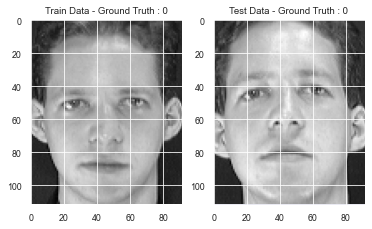

In [4]:
plt.subplot(121)
plt.imshow(trainX[0,:,:], cmap='gray')
plt.title("Train Data - Ground Truth : {}".format(trainY[0]))

plt.subplot(122)
plt.imshow(testX[0,:,:], cmap='gray')
plt.title("Test Data - Ground Truth : {}".format(testY[0]))

plt.show()

In [5]:
# Reshaping array and scaling pixel values to feed into the model

In [6]:
trainX = trainX.reshape(-1,112,92,1)
testX = testX.reshape(-1,112,92,1)

trainX = trainX/255
testX = testX/255



#### Change the labels from categorical to one-hot encoding

In [7]:
trainY_one_hot = to_categorical(trainY)
testY_one_hot = to_categorical(testY)

# Display the change for category label using one-hot encoding
print('Original label:', trainY[0])
print('After conversion to one-hot:', trainY_one_hot[0])

Original label: 0
After conversion to one-hot: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [8]:
print(np.random.choice(np.ravel(np.where(trainY==0)),size=3,replace=False))

[4 6 0]


#### Splitting train data into training and validation set

In [18]:
#train_X,valid_X,train_label,valid_label = train_test_split(trainX, trainY_one_hot, test_size=0.2, random_state=13)

'''
Splitting training data into train and validation. 3 random images were choosen from each class as validation data
'''
def vaidation_data_index():
    uniq_label = np.unique(trainY)
    lst = []
    for val in uniq_label:
        rand = np.random.choice(np.ravel(np.where(trainY==val)),size=3,replace=False)
        lst+=(list(rand))
    return lst

validation_list = vaidation_data_index()

train_X = np.delete(trainX,validation_list,axis=0)
train_label = np.delete(trainY_one_hot,validation_list,axis=0)
valid_X = trainX[validation_list]
valid_label = trainY_one_hot[validation_list]

### Build Model

In [10]:
model = Sequential()
model.add(Conv2D(64,kernel_size=(3,3),input_shape=(112,92,1),padding='same'))
model.add(ReLU())
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(64,kernel_size=(3,3),padding='same'))
model.add(ReLU())
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.40))
model.add(Dense(20,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 112, 92, 64)       640       
_________________________________________________________________
re_lu (ReLU)                 (None, 112, 92, 64)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 56, 46, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 56, 46, 64)        36928     
_________________________________________________________________
re_lu_1 (ReLU)               (None, 56, 46, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 23, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 41216)             0

#### Fitting the model on train data

In [11]:
trained_model = model.fit(train_X,train_label,batch_size=10,epochs=15,validation_data=(valid_X,valid_label),verbose=1)

Epoch 1/15
18/18 [==============================] - 3s 158ms/step - loss: 3.1338 - accuracy: 0.0722 - val_loss: 2.9937 - val_accuracy: 0.0500
Epoch 2/15
18/18 [==============================] - 3s 151ms/step - loss: 2.9943 - accuracy: 0.0500 - val_loss: 2.9741 - val_accuracy: 0.0833
Epoch 3/15
18/18 [==============================] - 3s 151ms/step - loss: 2.9522 - accuracy: 0.1000 - val_loss: 2.8655 - val_accuracy: 0.1000
Epoch 4/15
18/18 [==============================] - 3s 160ms/step - loss: 2.7169 - accuracy: 0.1500 - val_loss: 2.3886 - val_accuracy: 0.2000
Epoch 5/15
18/18 [==============================] - 3s 158ms/step - loss: 2.0256 - accuracy: 0.4167 - val_loss: 1.4184 - val_accuracy: 0.9000
Epoch 6/15
18/18 [==============================] - 3s 157ms/step - loss: 1.2370 - accuracy: 0.6222 - val_loss: 0.6555 - val_accuracy: 0.9667
Epoch 7/15
18/18 [==============================] - 3s 157ms/step - loss: 0.7684 - accuracy: 0.7833 - val_loss: 0.4537 - val_accuracy: 0.9167
Epoch 

#### Summarize history for accuracy and Loss over the epochs

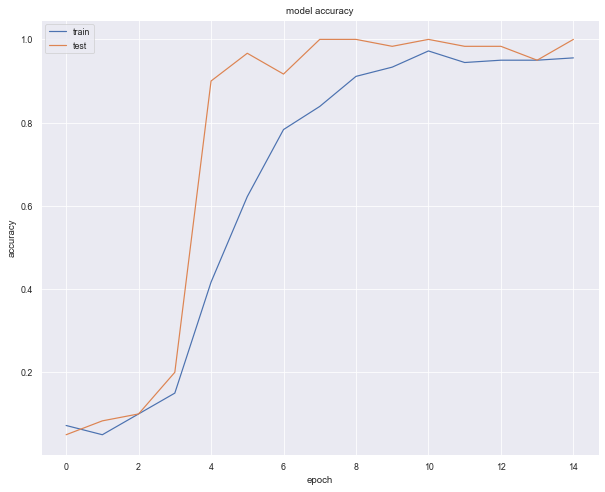

<Figure size 432x288 with 0 Axes>

In [15]:
# summarize history for accuracy
plt.figure(figsize=(10,8))
plt.plot(trained_model.history['accuracy'])
plt.plot(trained_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig("Model_Accuracy.jpeg")

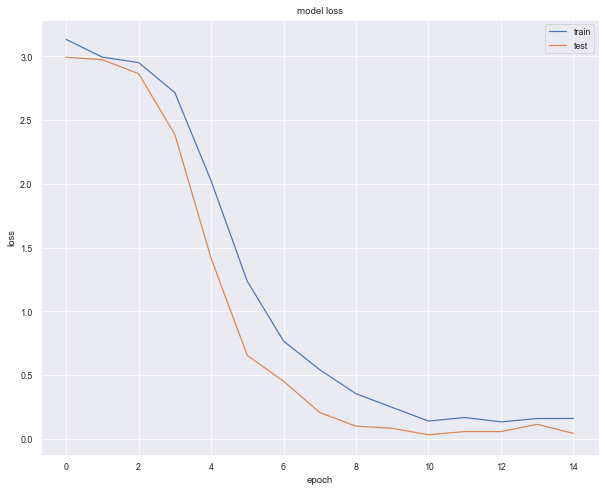

<Figure size 432x288 with 0 Axes>

In [16]:
# summarize history for loss
plt.figure(figsize=(10,8))
plt.plot(trained_model.history['loss'])
plt.plot(trained_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
plt.savefig("Model_Loss.jpeg")

#### Predication on test data set and checking the acuracy

In [17]:
prediction = model.evaluate(testX,testY_one_hot,verbose=0)
print("Test Loss : ",round(prediction[0],4))
print(r"Test Accuracy (%age): ",round(prediction[1]*100,4))

Test Loss :  0.1683
Test Accuracy (%age):  96.25
